In [0]:
!pip install cupy-cuda100 -user


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


# Imports

In [2]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Wider cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Make sure folder for images exist
import os
# try:
#     os.mkdir('img/task10')
# except FileExistsError as err:
#     pass

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Autocompletion fix
# %config Completer.use_jedi=False

# [High performance with <u><i><strong>CUDA</strong></i></u>](https://cupy.chainer.org/)
<u><i><strong>CuPy</strong></i></u> is an open-source matrix library accelerated with <u><i><strong>NVIDIA CUDA</strong></i></u>. <u><i><strong>CuPy</strong></i></u> provides GPU accelerated computing with Python. CuPy uses CUDA-related libraries including <u><i><strong>cuBLAS</strong></i></u>, <u><i><strong>cuDNN</strong></i></u>, <u><i><strong>cuRand</strong></i></u>, <u><i><strong>cuSolver</strong></i></u>, <u><i><strong>cuSPARSE</strong></i></u>, <u><i><strong>cuFFT</strong></i></u> and <u><i><strong>NCCL</strong></i></u> to make full use of the <u><i><strong>GPU</strong></i></u> architecture.
The figure shows <u><i><strong>CuPy</strong></i></u> speedup over NumPy. Most of them perform well on a <u><i><strong>GPU</strong></i></u> using CuPy out of the box. <u><i><strong>CuPy</strong></i></u> speeds up some operations more than 100X. You can read original benchmark article in [Single-<u><i><strong>GPU</strong></i></u> <u><i><strong>CuPy</strong></i></u> Speedups (RAPIDS AI)](https://medium.com/rapids-ai/single-gpu-cupy-speedups-ea99cbbb0cbb).

![CuPy speedup over NumPy](https://github.com/zakajd/HighPerformancePython/blob/master/img/misc/CuPy_Performance.png?raw=1)

# [Highly compatible with <u><i><strong>NumPy</strong></i></u>](https://cupy.chainer.org/)
<u><i><strong>CuPy</strong></i></u>'s interface is highly compatible with <u><i><strong>NumPy</strong></i></u>; in most cases it can be used as a <strong><i><u>drop-in replacement</u></i></strong>. <i><u>All you need to do</u></i> is just <strong><i><u>replace numpy with cupy</u></i></strong> in your Python code. [Basics of <u><i><strong>CuPy</strong></i></u> (Tutorial)](https://docs-cupy.chainer.org/en/stable/tutorial/basic.html) is usefull to learn first step of <u><i><strong>CuPy</strong></i></u>.
<u><i><strong>CuPy</strong></i></u> supports various methods, indexing, data types, broadcasting and more. [Comparison Table (Reference Manual)](https://docs-cupy.chainer.org/en/stable/reference/comparison.html) shows a list of NumPy / <u><i><strong>SciPy</strong></i></u> APIs and its corresponding <u><i><strong>CuPy</strong></i></u> implementations.

In [3]:
x = cp.arange(6).reshape(2, 3).astype('f')
print("x =\n", x)

sum_result = x.sum(axis=1)
print("\nsum = ",sum_result)

x =
 [[0. 1. 2.]
 [3. 4. 5.]]

sum =  [ 3. 12.]


# [Easy to write a custom kernel](https://cupy.chainer.org/)
You can easily make a custom <u><i><strong>CUDA</strong></i></u> kernel if you want to make your code run faster, requiring only a small code snippet of <u><i><strong>C++</strong></i></u>. <u><i><strong>CuPy</strong></i></u> automatically wraps and compiles it to make a <u><i><strong>CUDA</strong></i></u> binary. Compiled binaries are cached and reused in subsequent runs. Please read [User-Defined Kernels (Tutorial)](https://docs-cupy.chainer.org/en/latest/tutorial/kernel.html).
And, you can also use raw <u><i><strong>CUDA</strong></i></u> kernel via [Raw modules (Tutorial)](https://docs-cupy.chainer.org/en/latest/tutorial/kernel.html#raw-modules).


In [4]:
x=cp.arange(6, dtype='f').reshape(2, 3)
y=cp.arange(3, dtype='f')
kernel=cp.ElementwiseKernel(
    'float32 x,float32 y','float32 z',
        '''if(x-2>y){
        z=x*y;
        }else{
        z=x+y;
        }''',
    'my_kernel')

print("Input x = \n", x)
print("\nInput y = \n", y)

result = kernel(x, y)

print("\nresult of the kernel =\n", result)

Input x = 
 [[0. 1. 2.]
 [3. 4. 5.]]

Input y = 
 [0. 1. 2.]

result of the kernel =
 [[ 0.  2.  4.]
 [ 0.  4. 10.]]


# Task 10. Saxpy

By using <u><i><strong>CuPy</strong></i></u>, implement SAXPY function. The function is described in the picture.

![saxpy](https://github.com/zakajd/HighPerformancePython/blob/master/img/misc/saxpy.jpg?raw=1)

# T10.1 Explain difference between cupy and numpy. CPU -> GPU data transfer using CuPy

In [0]:
# Cupy uses GPU to perform computation. How is transfer is handled?

# T10.2 Function saxpy that runs on GPU using cupy is provided

In [0]:
def np_saxpy(x, y, a):
    return x*a + y

@cp.fuse()
def cp_saxpy(x, y, a):
    return x*a + y

In [7]:
np_res = []
for s in tqdm(np.logspace(2, 4, 20)):
    s = int(s)
    np_x, np_y, np_a = np.random.rand(s,s).astype(np.float32), np.random.rand(s,s).astype(np.float32), np.float32(4.5)
    t = %timeit -o -q np_saxpy(np_x, np_y, np_a);
    np_res.append(t)

In [8]:
cp_res = []
for s in tqdm(np.logspace(2, 4, 20)):
    s = int(s)
    cp_x, cp_y, cp_a = cp.random.rand(s,s,dtype='f'), cp.random.rand(s,s, dtype='f'), cp.float32(4.5)
    t = %timeit -q -o cp_saxpy(cp_x, cp_y, cp_a);
    cp_res.append(t)

# T10.3 Graph time(arrays_size) is given. 
Plot numpy and cupy implementations

In [15]:
np_res[0].best

8.063579530000027e-06

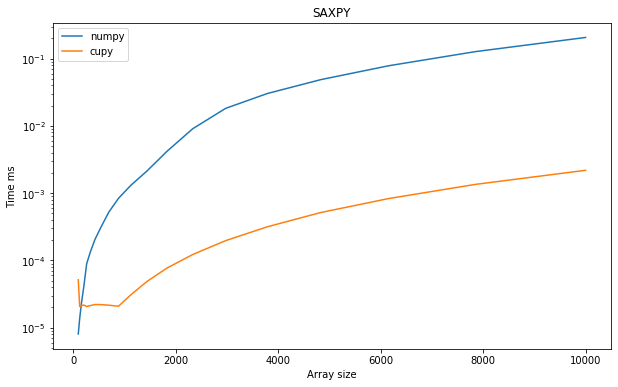

In [16]:
plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 4, 20), [i.best for i in np_res])
plt.plot(np.logspace(2, 4, 20), [i.best for i in cp_res])
plt.title('SAXPY')
plt.yscale('log')
plt.xlabel('Array size')
plt.ylabel('Time ms')
plt.legend(['numpy', 'cupy']);